In [45]:
import pandas as pd
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
output_data = pd.read_csv('/content/sample_submission.csv')

In [46]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
print(train_data.shape,test_data.shape)

(42000, 785) (28000, 784)


In [49]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [50]:
train_data.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [51]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [52]:
test_data.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [53]:
x = train_data.drop(columns=['label'])
y = train_data['label']

In [54]:
y.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


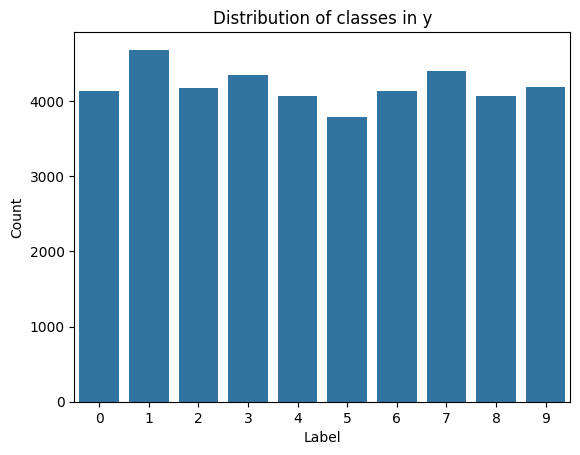

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of classes in y')
plt.show()

In [56]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


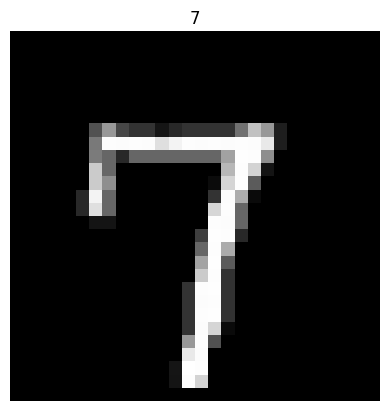

In [57]:
img = x.iloc[6].to_numpy()
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train_data.iloc[6,0])
plt.axis('off')
plt.show()

In [58]:
x = x/255.0
test_data = test_data/255.0

In [59]:
x_train = x.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
print(x_train.shape)
print(test_data.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [60]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,10)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y,test_size=0.1,random_state=42)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


In [83]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
cnn = Sequential()
input_shape = (28, 28, 1)

# Layer One
cnn.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(strides=(2,2)))
cnn.add(Dropout(0.25))

# Layers
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(strides=(2,2)))
cnn.add(Dropout(0.25))

# Utility Layer
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         410,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 950,666 (3.63 MB)

 Trainable params: 950,570 (3.63 MB)

 Non-trainable params: 96 (384.00 B)

In [85]:
from tensorflow.keras.optimizers import Adam
cnn.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=1e-4),metrics=['accuracy'])

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range = 0.1,height_shift_range = 0.1,width_shift_range = 0.1,rotation_range = 10)

In [87]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3)
history = cnn.fit(datagen.flow(x_train, y_train, batch_size=50),
                             epochs=10,
                             verbose=2,
                             validation_data=(x_test,y_test),
                             callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


756/756 - 23s - 30ms/step - accuracy: 0.5767 - loss: 1.2790 - val_accuracy: 0.9224 - val_loss: 0.2623
Epoch 2/10
756/756 - 14s - 19ms/step - accuracy: 0.8239 - loss: 0.5407 - val_accuracy: 0.9583 - val_loss: 0.1356
Epoch 3/10
756/756 - 14s - 19ms/step - accuracy: 0.8872 - loss: 0.3533 - val_accuracy: 0.9633 - val_loss: 0.1074
Epoch 4/10
756/756 - 14s - 19ms/step - accuracy: 0.9111 - loss: 0.2787 - val_accuracy: 0.9679 - val_loss: 0.0906
Epoch 5/10
756/756 - 15s - 19ms/step - accuracy: 0.9261 - loss: 0.2337 - val_accuracy: 0.9783 - val_loss: 0.0686
Epoch 6/10
756/756 - 14s - 19ms/step - accuracy: 0.9369 - loss: 0.2012 - val_accuracy: 0.9755 - val_loss: 0.0728
Epoch 7/10
756/756 - 20s - 27ms/step - accuracy: 0.9433 - loss: 0.1814 - val_accuracy: 0.9793 - val_loss: 0.0619
Epoch 8/10
756/756 - 14s - 19ms/step - accuracy: 0.9482 - loss: 0.1660 - val_accuracy: 0.9795 - val_loss: 0.0609
Epoch 9/10
756/756 - 20s - 27ms/step - accuracy: 0.9532 - loss: 0.1479 - val_accuracy: 0.9829 - val_loss: 0

In [88]:
y_pred = cnn.predict(x_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [89]:
import numpy as np
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test_labels,y_pred_labels)

In [91]:
accuracy_score

0.9821428571428571

In [92]:
y_pred2 = cnn.predict(test_data)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [93]:
y_pred2

array([[6.2383762e-08, 2.3257244e-06, 9.9994218e-01, ..., 1.2226632e-05,
        8.2243173e-07, 3.3268741e-08],
       [9.9972612e-01, 1.1512394e-06, 2.1893293e-05, ..., 2.9232913e-05,
        2.7694963e-05, 1.3541819e-04],
       [1.5207983e-06, 1.2455733e-08, 8.5842534e-05, ..., 1.2444699e-05,
        3.7029505e-02, 9.6279848e-01],
       ...,
       [9.2463953e-14, 8.9079771e-10, 4.1542116e-09, ..., 6.5051102e-09,
        3.8526455e-08, 2.1551889e-09],
       [2.0280072e-06, 1.9685729e-07, 5.0365275e-06, ..., 6.7773816e-04,
        5.9519334e-05, 9.9767917e-01],
       [1.8545135e-08, 2.6225004e-07, 9.9995077e-01, ..., 3.3689455e-06,
        4.5525312e-06, 7.8018537e-08]], dtype=float32)

In [94]:
y_test_labels2 = np.argmax(y_pred2, axis=1)


In [95]:
y_test_labels2

array([2, 0, 9, ..., 3, 9, 2])

In [96]:
test_ids=range(1,28001)

In [97]:
import pandas as pd
submission = pd.DataFrame({
    'ImageId': test_ids,  # Replace with the IDs of the test samples
    'Label': y_test_labels2  # Replace with the predicted labels
})
submission.to_csv('submission.csv', index=False)

In [98]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [99]:
d=pd.read_csv('/content/submission.csv')

In [100]:
d

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


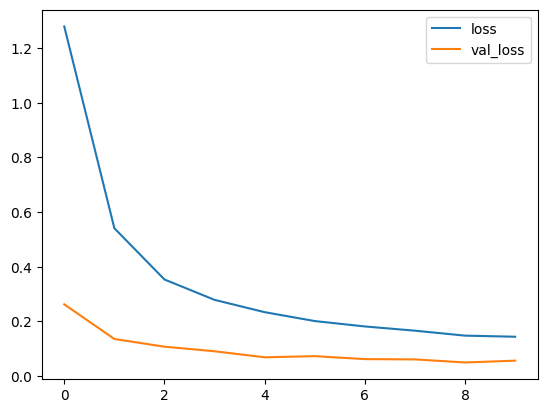

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

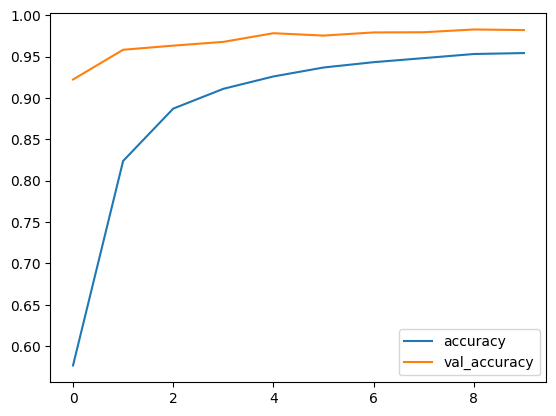

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])